In these examples, we will look at some cross-linguistic word form data and study some models that allow us to look at optimal phylogenies. We will use data from the following paper.


[Dellert, Johannes, Daneyko, T., Muench, A., Ladygina, A., Buch, A., Clarius, N., Grigorjew, I., Balabel, M., Boga, H. I., Baysarova, Z., Muehlenbernd, R., Wahle, J., and Jaeger, G. (2020). Northeuralex: A wide-coverage lexical database of northern eurasia. Language Resources & Evaluation, 54(273–301).](https://drive.google.com/file/d/1ptoMNctdJs99wPWfBUGbw4_X60NtKl9B/view?usp=sharing)

This data was can be found [here](http://northeuralex.org/) as well.

Copy the data to your drive folder from: [here](https://drive.google.com/file/d/1Mfa8XayBFJb0fY8wfinODw90yuRal8AD/view?usp=sharing), [here](https://drive.google.com/file/d/1AQqkscWKlq3quw-BWjB8xqSQzm7-uDtt/view?usp=sharing), and [here](https://drive.google.com/file/d/1R7ZLEzDW9QKUen3BjItPsySaUPCpu7xk/view?usp=sharing).

***Question 1:*** What is the Northeuralex dataset? Give a brief overview. What kind of data is it? What is its purpose? How was it constructed? No need to go into all of the particulars (such as fields of the files), just give an overview of no more than one paragraph that gives the gist for someone unfamiliar with the dataset.

**Q1: put your answer here (please keep it brief, 3-5 sentences)**

Northeuralex is a lexical database which covers core 1016 vocabulary concepts across 107 languages from Northern Eurasia. It includes phonetical transcription in IPA format, as well as additional information like labelled semantic categories and ranking of the basicness of concepts. To obtain the data, a list of 1016 concepts was created with consideration for its relevance to place/time and for reducing overlaps in meaning. Corresponding words in all languages were obtained by a systematic process that extracts data from dictionary resources in source languages with reverse lookup for verification. Phonetic representation was first created by a transcription program that is directed by the language's pronounciation rules. Experts in relevant languages provided feedback to ensure the quality of word selection and transcription. The purpose of the dataset is to aid the study of historical linguistics by allowing easy lookup of information that would otherwise have to be searched for in individual dictionaries. For example, it could be used to detect cognates which underwent semantic shifts, infer contact events between languages, or investigate the correlation between phoneme size with population size/geographical isolation.




Let's read in the wordforms in this dataset.

In [24]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
wordforms=pd.read_csv("/content/drive/My Drive/northeuralex.csv")
display(wordforms)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate
...,...,...,...,...,...,...,...,...,...,...
121608,cmn,mand1415,verkaufen::V,卖,mâɪ̯,m a ɪ,mai,MAI,MV,validate
121609,cmn,mand1415,bezahlen::V,付钱,fû t͡ɕʰjɛ̌n,f u _ t͡ɕ ʰ j ɛ n,fuCyEn,BY_CJE2N,PV_KJV1N,validate
121610,cmn,mand1415,zahlen::V,支付,t͡ʂɨ˦fû,t ʂ ɨ f u,C3fu,CI1BY,KV1PV,validate
121611,cmn,mand1415,beherrschen::V,统治,tʰʊ̂̌ŋt͡ʂɨ̂,tʰ ʊ ŋ t ʂ ɨ,tuNC3,TY2NCI,TV1NKV,validate


***Question 2:*** Describe the meaning of the `Langauge_ID`, `Concept_ID`, `rawIPA` and `IPA` columns of the data.

**Q2: put your answer here (please keep it brief, no more than 1 sentence per column)**

Language_ID: Which language the word is from, e.g. "fin" is Finnish and "cmn" is Mangarin Chinese.

Concept_ID: The concept word in German since that was the main reference language, and semantic category, e.g. "V" for verb

rawIPA: Pronounciation in "International Phonetic Alphabet" which provides a unique symbol for each distinctive sound.

IPA: A more processed form of rawIPA that is sure to be uniform between languages

Now let's read in some metadata about the languages.

In [25]:
languages=pd.read_csv("/content/drive/My Drive/northeuralex-languages.csv")
display(languages)

,name,glotto_code,iso_code,family,subfamily,latitude,longitude
0,Finnish,finn1318,fin,Uralic,Finnic,61.0000,24.4500
1,North Karelian,kare1335,krl,Uralic,Finnic,65.1691,30.8655
2,Olonets Karelian,livv1243,olo,Uralic,Finnic,61.0000,33.0000
3,Veps,veps1250,vep,Uralic,Finnic,60.3353,34.7865
4,Estonian,esto1258,ekk,Uralic,Finnic,59.2500,24.7500
...,...,...,...,...,...,...,...
102,Dargwa,darg1241,dar,Nakh-Daghestanian,Daghestanian,42.4257,47.4388
103,Chechen,chec1245,che,Nakh-Daghestanian,Nakh,43.5000,45.5000
104,Standard Arabic,stan1318,arb,Afro-Asiatic,Semitic,27.9625,43.8525
105,Modern Hebrew,hebr1245,heb,Afro-Asiatic,Semitic,31.1056,35.0179


***Question 3:*** Describe the meaning of the `Family`, `iso_code`, and `subfamily` columns of the data.

**Q3: put your answer here (please keep it brief, no more than 1 sentence per column)**

Family: Which group the language belongs to based on its phylogenetically-derived origin, languages in the same family are derived from a common ancestor

Iso_code: The 3-symbol code of the language in "International Organization for Standardization" format, e.g. "fin" is Finnish; like "Language_ID" in the first table

Subfamily: Which smaller group within the family a lanugage belongs to based on its origin



Now let's read in some further data about the concepts.



In [26]:
concepts=pd.read_csv("/content/drive/My Drive/northeuralex-concepts.csv")
display(concepts)

,number,position_in_ranking,ranking_value,id_nelex,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,1,44,"-2,539237",Auge::N,eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,2,34,"-2,649194",Ohr::N,ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN
2,3,149,"-1,995463",Nase::N,nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN
3,4,25,"-2,762589",Mund::N,mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN
4,5,31,"-2,670705",Zahn::N,tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1012,140,"-2,029052",verkaufen::V,sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN
1012,1013,198,"-1,822012",bezahlen::V,pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN
1013,1014,235,"-1,715766",zahlen::V,pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN
1014,1015,899,"0,118183",beherrschen::V,rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN


***Question 4:*** Describe the meaning of the `id_nelex`, `gloss_en`, and `position_in_ranking` columns of the data.

**Q4: put your answer here (please keep it brief, no more than 1 sentence per column)**

ID_nelex: The same "Concept_ID" in the first table

Gloss_en: The concept word in English

Position_in_ranking: A ranking of basicness of the concept, accounting for it being simple and distinct from other concepts, e.g. "eye" is more basic than "endure" since it has a lower ranking


It will be useful to merge all of the meta-information into the main wordforms dataframe.

In [35]:
# Problem 1a: rename the approproate columns in the languages and concepts dataframes to make this merge possible.
languages.rename(columns={"iso_code": "Language_ID"}, inplace=True)
concepts.rename(columns={"id_nelex": "Concept_ID"}, inplace=True)

#display(languages)
#languages.columns
#wordforms.columns

# Problem 1b: Use the merge function to merge the three dataframes into one.
#your code here

wordforms2 = pd.merge(wordforms, languages)
wordforms3 = pd.merge(wordforms2, concepts)
wordforms = wordforms3
display(wordforms)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,name,glotto_code,family,subfamily,latitude,longitude,number,position_in_ranking,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,Finnish,finn1318,Uralic,Finnic,61.0000,24.4500,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,krl,kare1335,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,North Karelian,kare1335,Uralic,Finnic,65.1691,30.8655,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
2,olo,livv1243,Auge::N,silmy,silmʏ,s i l m ʏ,silmi,SILMY,SVRMV,validate,Olonets Karelian,livv1243,Uralic,Finnic,61.0000,33.0000,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
3,vep,veps1250,Auge::N,sil'm,silʲm,s i lʲ m,silm,SILM,SVRM,validate,Veps,veps1250,Uralic,Finnic,60.3353,34.7865,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
4,ekk,esto1258,Auge::N,silm,sʲilm,sʲ i l m,silm,SILM,SVRM,validate,Estonian,esto1258,Uralic,Finnic,59.2500,24.7500,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121608,heb,hebr1245,ertragen::V,סבל,saval,s a v a l,saval,SABAL,SVWVR,validate,Modern Hebrew,hebr1245,Afro-Asiatic,Semitic,31.1056,35.0179,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121609,cmn,mand1415,ertragen::V,忍耐,ɻə̂̌nnâɪ̯,ɻ ə n n a ɪ,L3nai,RE2NNAI,RV1NNV,validate,Mandarin Chinese,mand1415,Sino-Tibetan,Sinitic,40.0209,116.2280,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121610,bua,buri1258,ertragen::V,тэсэхэ,tɛsɛxɛ,t ɛ s ɛ x ɛ,tEsExE,TESEGE,TVSVKV,validate,Buryat,buri1258,Mongolic,Eastern Mongolic,51.8300,107.6000,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121611,bua,buri1258,ertragen::V,тэсэжэ гараха,tɛsɛʒɛ ɡaraxa,t ɛ s ɛ ʒ ɛ _ ɡ a r a x a,tEsEZEgaraxa,TESESE_KARAGA,TVSVSV_KVRVKV,validate,Buryat,buri1258,Mongolic,Eastern Mongolic,51.8300,107.6000,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN


In this problem set, we will make use of the `lingpy` package of tools for historical linguistics. You can find more information on this [here](https://lingpy.org/index.html). We'll start by installing the package.

In [36]:
!pip install lingpy

     |████████████████████████████████| 3.0MB 8.9MB/s 
     |████████████████████████████████| 1.7MB 38.3MB/s 
     |████████████████████████████████| 163kB 39.7MB/s 
     |████████████████████████████████| 194kB 37.0MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 286kB 40.7MB/s 
  Created wheel for lingpy: filename=lingpy-2.6.6-cp36-none-any.whl size=1263437 sha256=c839252392fb951b2efef497c094c7e7ab02e7a2408180d4189130d0928667f7
  Stored in directory: /root/.cache/pip/wheels/d6/95/95/98f4bb29280d4602ee2032395b850c845bcc837e8cd6f9a6a8
  Created wheel for networkx: filename=networkx-2.2-py2.py3-none-any.whl size=1527322 sha256=05ce81863fc085e9bcd37ac27fb347e4bfd920c73db47104e92633c82dae7bef
  Stored in directory: /root/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
Successfully built lingpy networkx
ERROR: albumentations 0.1.12 has requirement imgaug<0

In order to make our computations below more manageable, we will focus on the Indo-european languages which you can read more about [here](https://en.wikipedia.org/wiki/Indo-European_languages). We will also focus just on the top 20 concepts as determined by their rank.

In [220]:
#Problem 2a: Filter out the non-Indo-European languages from the wordforms and languages dataframes
indo_eur = wordforms[wordforms['family'] == "Indo-European"]

#Problem 2b: Filter our the concepts which appear less than or equal to rank 20 in the concepts dataframe.
max_rank=20
top_concepts = indo_eur[indo_eur['position_in_ranking'] <= max_rank]
display(top_concepts)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,name,glotto_code,family,subfamily,latitude,longitude,number,position_in_ranking,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
7163,ben,beng1280,Wasser::N,জল,d͡ʒɔl,d͡ʒ ɔ l,jol,CUL,KVR,validate,Bengali,beng1280,Indo-European,Indo-Aryan,24.0000,90.0000,63,19,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
7164,hin,hind1269,Wasser::N,जल,d͡ʒəl,d͡ʒ ə l,j3l,CEL,KVR,validate,Hindi,hind1269,Indo-European,Indo-Aryan,27.2000,78.0000,63,19,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
7165,hin,hind1269,Wasser::N,पानी,paːniː,p a a n i i,pani,PANI,PVNV,validate,Hindi,hind1269,Indo-European,Indo-Aryan,27.2000,78.0000,63,19,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
7166,pbu,nort2646,Wasser::N,اوبه,oˈbə,o b ə,ob3,UPE,VPV,validate,Northern Pashto,nort2646,Indo-European,Iranian,32.1000,67.2000,63,19,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
7167,pes,west2369,Wasser::N,آب,ɒːb,ɒ ɒ b,ob,OP,VP,validate,Western Farsi,west2369,Indo-European,Iranian,28.6593,55.1586,63,19,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107539,cat,stan1289,geben::V,donar,d̪una,d u n a,duna,TYNA,TVNV,validate,Catalan,stan1289,Indo-European,Italic,41.4530,1.5690,898,2,"-3,482883",give,дать,"[allgemein, BSP:Gegenstand]",[],[],GIVE,1447,GIVE,NaN
107540,spa,stan1288,geben::V,dar,daɾ,d a ɾ,dar,TAR,TVR,validate,Spanish,stan1288,Indo-European,Italic,42.2500,-3.7000,898,2,"-3,482883",give,дать,"[allgemein, BSP:Gegenstand]",[],[],GIVE,1447,GIVE,NaN
107541,por,port1283,geben::V,dar,dar,d a r,dar,TAR,TVR,validate,Portuguese,port1283,Indo-European,Italic,39.9100,-8.1000,898,2,"-3,482883",give,дать,"[allgemein, BSP:Gegenstand]",[],[],GIVE,1447,GIVE,NaN
107542,ita,ital1282,geben::V,dare,dare,d a r e,dare,TARE,TVRV,validate,Italian,ital1282,Indo-European,Italic,43.0464,12.6489,898,2,"-3,482883",give,дать,"[allgemein, BSP:Gegenstand]",[],[],GIVE,1447,GIVE,NaN


Our goal is to use agglomerative clustering to try to reconstruct the tree for the indoeuropean languages. You can find a reference tree (for families) [here](https://en.wikipedia.org/wiki/Indo-European_languages#/media/File:IndoEuropeanLanguageFamilyRelationsChart.jpg).

In order to do this, we will need to construct a  matrix of similarities between the languages, called a confusion matrix.

We will compute the (normalized) levenshtein distance between the strings for each concept for each pair of languages. For instance, we we will compute the normalized levenshtein distance between the words for Auge::N (eye in English) for German and English and then similarily for all 19 other concepts. We will then average these values to find the similarity between German and English. We will do this for all pairs of languages to create a list of lists representing the confusion matrix.

Note that running your code will take a few minutes.

In [221]:
import lingpy as lp
import numpy as np
from statistics import mean

#initialize confusion matrix
language_list = top_concepts.name.unique()
concept_list = top_concepts.Concept_ID.unique()
confusion= [[0 for j in range(len(language_list))] for i in range(len(language_list))]

#Problem 3: fill the confusion matrix  using the 
#lp.align.pairwise.edit_dist function from lingpy, on 
#the "IPA" fields for each language.

print("language list length: ", len(language_list))
print("confusion list: ", len(confusion[0]))
print(language_list)

language1_ind=0
language2_ind=0

for language1 in language_list:
  for language2 in language_list:

    #list of distances 
    distances=[]

    #iterate through top 20 concepts
    for concept in concept_list:
      temp = top_concepts[(top_concepts['Concept_ID'] == concept) & ((top_concepts['name'] == language1) | (top_concepts['name'] == language2))]
      IPA_1=""
      IPA_2=""
      #iterate through the dataframe to find the two IPAs of the given concept in the gigven languages
      for index, row in temp.iterrows(): 
        if(row["Concept_ID"]==concept and row["name"]==language1):
          IPA_1=row["IPA"]
        if(row["Concept_ID"]==concept and row["name"]==language2):
          IPA_2=row["IPA"]
      #calculate the distance and append it to the list of distances
      distance=lp.align.pairwise.edit_dist(IPA_1, IPA_2, normalized=True)
      distances.append(distance)

    #the distance between two languages as an average distance between all concepts
    average_distance = mean(distances)
    #write the distance into the confusion matrix, the two languages intersect in two places
    confusion[language1_ind][language2_ind]=average_distance
    confusion[language2_ind][language1_ind]=average_distance

    #REPORT progress
    print("writing languages number: ", language1_ind, language1, "and ", language2_ind, language2)

    language2_ind=language2_ind+1
  language1_ind=language1_ind+1
  language2_ind=0

print(confusion)
    

language list length:  37
confusion list:  37
['Bengali' 'Hindi' 'Northern Pashto' 'Western Farsi' 'Northern Kurdish'
 'Ossetian' 'Armenian' 'Modern Greek' 'Standard Albanian' 'Bulgarian'
 'Croatian' 'Slovene' 'Slovak' 'Czech' 'Polish' 'Ukrainian' 'Belarusian'
 'Russian' 'Lithuanian' 'Latvian' 'Icelandic' 'Norwegian (Bokmål)'
 'Swedish' 'Danish' 'German' 'Dutch' 'English' 'Irish' 'Welsh' 'Breton'
 'Latin' 'French' 'Catalan' 'Spanish' 'Portuguese' 'Italian' 'Romanian']
writing languages number:  0 Bengali and  0 Bengali
writing languages number:  0 Bengali and  1 Hindi
writing languages number:  0 Bengali and  2 Northern Pashto
writing languages number:  0 Bengali and  3 Western Farsi
writing languages number:  0 Bengali and  4 Northern Kurdish
writing languages number:  0 Bengali and  5 Ossetian
writing languages number:  0 Bengali and  6 Armenian
writing languages number:  0 Bengali and  7 Modern Greek
writing languages number:  0 Bengali and  8 Standard Albanian
writing languages num

Now that we have computed a matrix of similarities, we can use clustering algorithms to try to build phylogenetic trees representing the languages historical relationships. First, let's use the `lp.algorithm.clustering.flat_cluster` function from `lingpy` to derive a flat clustering of languages. 


In [200]:
#language_names=list(languages["Language_ID"].values)

#Couldn't solve errors with given code to cluster actual names, go by numbers corresponding to language names
for i in range(len(language_list)):
  print (i, language_list[i])

print("")
lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion)

0 Bengali
1 Hindi
2 Northern Pashto
3 Western Farsi
4 Northern Kurdish
5 Ossetian
6 Armenian
7 Modern Greek
8 Standard Albanian
9 Bulgarian
10 Croatian
11 Slovene
12 Slovak
13 Czech
14 Polish
15 Ukrainian
16 Belarusian
17 Russian
18 Lithuanian
19 Latvian
20 Icelandic
21 Norwegian (Bokmål)
22 Swedish
23 Danish
24 German
25 Dutch
26 English
27 Irish
28 Welsh
29 Breton
30 Latin
31 French
32 Catalan
33 Spanish
34 Portuguese
35 Italian
36 Romanian



{0: [0],
 1: [1],
 2: [2],
 3: [3, 4],
 5: [5],
 6: [6],
 7: [7],
 8: [8],
 18: [18, 19, 9, 12, 14, 13, 16, 17, 15, 10, 11],
 24: [24, 25, 20, 21, 22, 23, 26],
 27: [27],
 28: [28, 29],
 30: [30],
 31: [31],
 32: [32, 33, 34, 35, 36]}

***Question 5:*** Do you recognize any of the clusters of languages? Are there any noteworthy errors in this clustering?

**Q5: put your answer here (please keep it brief, no more than 4-5 sentences.)**

It seems that the clustering method is picking up on correct groupings:
* The biggest cluster after "18:" contains the Balto-slavic languages.
* Second biggest cluster under "24:" are the Germanic languages.
* Welsh and Breton (28, 29) are Celtic languages.
* Languages 32-36 are Romance languages (subgroup of Italic)
* Western Farsi and Northern Kurdish (3-4) are Iranian languages.

However, many languages remain ungrouped even if they could be closer to some clusters than others, e.g. French could be grouped with Romance languages but is not being clustered with them. 


Now we will build our own dendrogram using the clustering algorithms available in [`scipy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). You can read in particular about the [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function and the [`dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


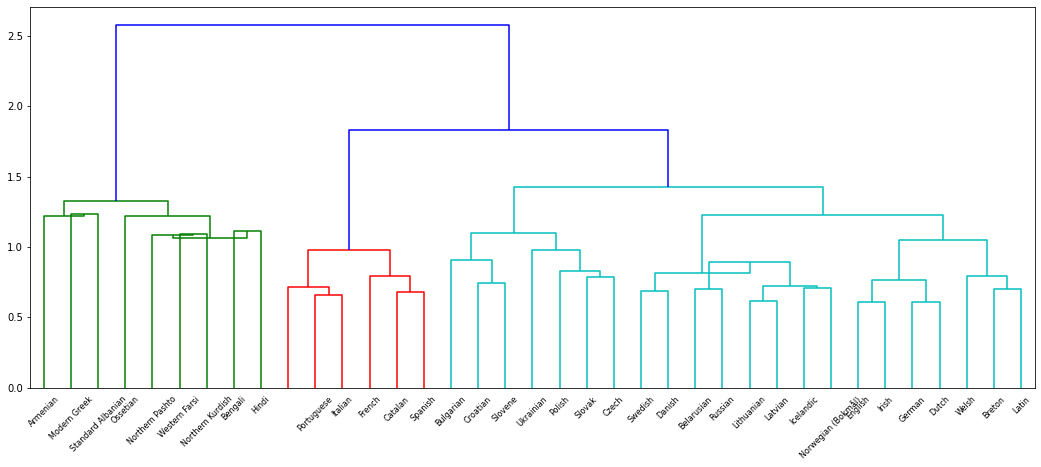

In [222]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import v_measure_score
import matplotlib.pyplot as plt
import scipy


#making the matrix only the upper triangle without repetition 
confusion2= [[0 for j in range(len(language_list))] for i in range(len(language_list))]
max_col=36
for i in range(36):
  for j in range(max_col):
    confusion2[i][j] = confusion[i][j]
  max_col = max_col-1


#Problem 4: use the linkage function with the average linkage method to compute the clustering.
linked = scipy.cluster.hierarchy.linkage(confusion2, method="centroid")


#plot the results using dendrogram

#Rewrote this to label names without errors
def llf(id):
    if id < 36:
        return language_list[id]
    else:
        return


#def llf(id): return list(languages["Language_ID"].values)[id]
plt.figure(figsize=(18, 7))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

***Question 6:*** Do you recognize any of the clusters of languages at any of the levels? Are there any noteworthy erros in this clustering?

**Q6: put your answer here (please keep it brief, no more than 4-5 sentences.)**

Lookig at the "centroid" method with 20 concepts.
In the reference wikipedia image, the Iranian and Indo-Aryan languages are closely linked, this is also shown in the green cluster even if some details are wrong. The red cluster groups the romantic languages. In teal clusters, Balto-slavic languages are mostly grouped closer to each other. 
Some errors are that e.g. "Danish" is among Balto-Slavic neighbours instead of the Germanic group. 


***Question 7:*** Try three of the other linkage methods and describe how the change the results.

**Q7: put your answer here (please keep it brief, no more than 4-5 sentences.)**


***Question 8:*** Try increasing the number of concepts we use to compute our confusion matrix to be higher than 20. Does it change the results?

**Q8: put your answer here (please keep it brief, no more than 3-4 sentences.)**

Running this with 50 concepts and "centroid" method. There are fewer clusters, with teal and red merging into red, suggesting that more data made the languages appear more similar. If running with even more data, one would expect the clustering to become more accurate compared to reference. 

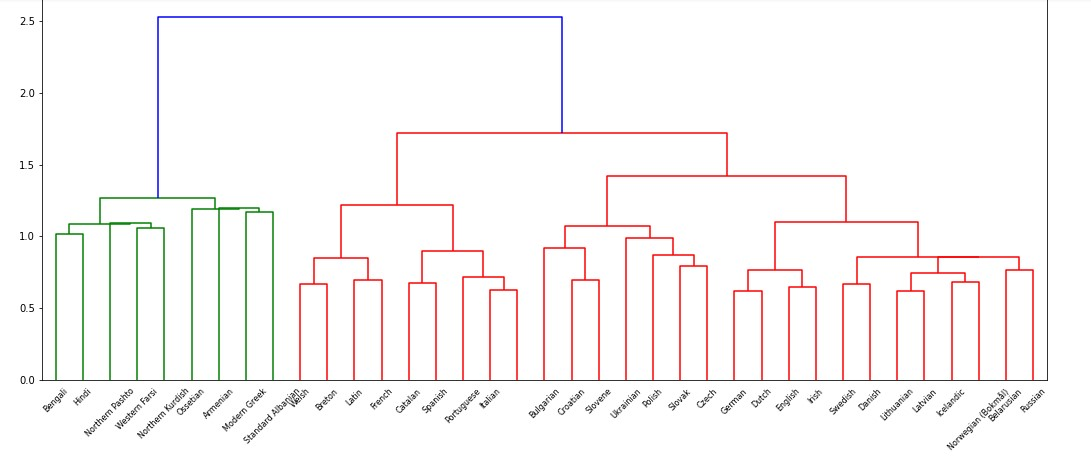